# Plotly


## Instalações

## Import

In [14]:
pip install jupyter_to_medium

In [1]:
import pandas as pd 
import numpy as np
import cufflinks as cf
import chart_studio.plotly as py
import seaborn as sns
import plotly.express as px
%matplotlib inline 
import plotly.graph_objects as go 
from plotly.offline import download_plotlyjs, init_notebook_mode,plot, iplot 
init_notebook_mode(connected=True)
cf.go_offline

<function cufflinks.offline.go_offline(connected=None)>

## Basicos

<AxesSubplot:>

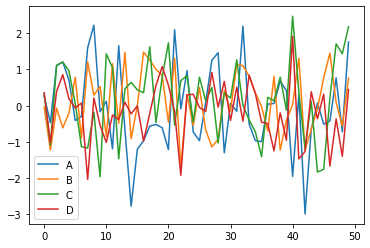

In [11]:
# gráfico estático,ou seja, sem interação.
arr_1 = np.random.randn(50,4) # criando um data frame com 50 linhas e 4 colunas
df_1 = pd.DataFrame(arr_1,columns=["A_1",'B_1','C_1','D_1']) # nomeando as colunas 

df_1.plot() 

In [12]:
# Data Frame criado
df_1.head()

,A,B,C,D
0,0.265097,-0.040299,0.319875,0.359486
1,-0.467845,-1.233083,-1.091478,-1.027393
2,1.113197,-0.068813,1.113254,0.398255
3,1.205799,-0.612696,1.207442,0.856109
4,0.702419,-0.195217,0.956382,0.188455


### Line plot

In [6]:

df_stocks = px.data.stocks() # data frame usando para plota o gráfico 
px.line(df_stocks, x="date", y ="GOOG", labels ={'x':'Date','y':'Price'})



In [7]:
px.line(df_stocks , x="date",y=["GOOG","AAPL"],
        labels ={'x':'Date','y':'Price'},title ="AÇÕES DE TECNOLOGIA"
       )

In [8]:
# Criando 3 graficos 
fig= go.Figure()
fig.add_trace(go.Scatter(x= df_stocks.date, y = df_stocks.AAPL,
                        mode='lines', name = "Apple"
                        ))
fig.add_trace(go.Scatter(x= df_stocks.date, y = df_stocks.AMZN,
                        mode='lines+markers', name = "Amazon"
                        ))
fig.add_trace(go.Scatter(x= df_stocks.date, y = df_stocks.GOOG,
                        mode='lines+markers', name = "Google",
                        line = dict(color="firebrick",width =2,
                                   dash = "dashdot")))

In [9]:
# criando uma layout para os 3 graficos 
fig= go.Figure()
fig.add_trace(go.Scatter(x= df_stocks.date, y = df_stocks.AAPL,
                        mode='lines', name = "Apple"
                        ))
fig.add_trace(go.Scatter(x= df_stocks.date, y = df_stocks.AMZN,
                        mode='lines+markers', name = "Amazon"
                        ))
fig.add_trace(go.Scatter(x= df_stocks.date, y = df_stocks.GOOG,
                        mode='lines+markers', name = "Google",
                        line = dict(color="firebrick",width =2,
                                   dash = "dashdot")))

fig.update_layout(title ="Preço da ações de 2018 - 2020",
                 xaxis_title= "Preço",yaxis_title ="Data"
                 )

### Deixando o grafico mais personalizado
+ Tirando a grid 
+ Tirando o eixo y (ocultando)
+ Alterando a fonte e tamanho

In [10]:


fig= go.Figure()
fig.add_trace(go.Scatter(x= df_stocks.date, y = df_stocks.AAPL,
                        mode='lines', name = "Apple"
                        ))
fig.add_trace(go.Scatter(x= df_stocks.date, y = df_stocks.AMZN,
                        mode='lines+markers', name = "Amazon"
                        ))
fig.add_trace(go.Scatter(x= df_stocks.date, y = df_stocks.GOOG,
                        mode='lines+markers', name = "Google",
                        line = dict(color="firebrick",width =2,
                                   dash = "dashdot")))

fig.update_layout(
xaxis = dict(
showline=True, showgrid =False,showticklabels =True,
linecolor ='rgb(204,204,204)',                        #Tirando a grid 
linewidth=2, ticks ='outside', tickfont=dict(         # Alterando a fonte e tamanho
family ='Arial',size =12,color ='rgb(82,82, 82)',    
),    
      
),
yaxis = dict(showgrid =False,zeroline =False,showline = False,showticklabels =False),  # Tirando o eixo y

    
autosize =False,
margin =dict(
autoexpand =False, l=100, r = 20, t =110),
showlegend =False, plot_bgcolor ='white'    
    

)

## Bar charts

In [17]:
# Modelo simples

df_us = px.data.gapminder().query("country=='United States'")
px.bar(df_us, x='year',y='pop')

In [21]:

df_tips = px.data.tips()
px.bar(df_tips, x="day",y='tip',color='sex',
      title="Tips by Sex on Each Day",
      labels ={'tip':'Tip Amount','day':'Day of the week'} 
      )

In [22]:
px.bar(df_tips, x="sex",y='total_bill',color='smoker', barmode="group")

In [23]:
df_europe = px.data.gapminder().query("continent=='Europe' and year == 2007 and pop >2.e6")

fig = px.bar(df_europe, y ='pop', x='country', text ="pop", color ='country')
fig

In [26]:
fig = px.bar(df_europe, y ='pop', x='country', text ="pop", color ='country')
fig.update_traces(texttemplate ='%{text:.2s}', textposition ='outside')
fig.update_layout(uniformtext_minsize=8)
fig.update_layout(xaxis_tickangle =-45) # ângulo

fig

In [31]:
fig = px.bar(df_europe, y ='pop', x='country', text ="pop", color ='country')
fig.update_traces(texttemplate ='%{text:.2s}', textposition ='outside')
fig.update_layout(uniformtext_minsize=8)
fig.update_layout(xaxis_tickangle =-45) # ângulo

fig

## Scatter Plots

In [32]:
df_iris = px.data.iris()
px.scatter(df_iris, x='sepal_width',y='sepal_length',
          color ="species",size ='petal_length',
          hover_data =['petal_width'] 
          )

In [33]:
fig = go.Figure()
fig.add_trace(go.Scatter(
x= df_iris.sepal_width, y = df_iris.sepal_length,
mode ="markers",
marker_color =df_iris.sepal_width,
text = df_iris.species, marker = dict(showscale =True)))

fig.update_traces(marker_line_width=2, marker_size=10)


In [35]:
fig = go.Figure(data = go.Scattergl(x=np.random.randn(10000),
                                    y=np.random.randn(10000),
                                    mode="markers",
                                    marker= dict(
                                    color=np.random.randn(10000),
                                    colorscale ='Viridis',
                                    line_width =1)))

fig

## Pie Charts
https://plotly.com/python/builtin-colorscales/

In [55]:
df_asia = px.data.gapminder().query("year==2007").query("continent=='Asia'")

px.pie(df_asia,values='pop',names ='country',
      title ='Population of Asian Continent',
      width=800, height=800, 
      color_discrete_sequence= px.colors.sequential.RdBu)                  # Built in continuous color scales in python
      

In [57]:
color =['blue','green','black','purple','red','brown']

fig = go.Figure(data=[go.Pie(labels=['Water','Grass','Normal','Psychic','Fire','Ground'],
                                    values=[110,90,80,80,70,60])])

fig

In [61]:
color =['blue','green','black','purple','red','brown']

fig = go.Figure(data=[go.Pie(labels=['Water','Grass','Normal','Psychic','Fire','Ground'],
                                    values=[110,90,80,80,70,60])])

fig.update_traces(hoverinfo ='label+percent',textfont_size = 20,
                 textinfo='label+percent',pull=[0.1, 0, 0.2, 0, 0, 0],
                 marker = dict(colors=color, line= dict(color='#FFFFFF'))
                  
                 )
fig

## Histogram

In [63]:
dice_1 = np.random.randint(1,7,5000)
dice_2 = np.random.randint(1,7,5000)
dice_sum =dice_1 + dice_2

fig = px.histogram(dice_sum, nbins=11,
                  labels ={'value':'Dice Roll'},
                  title='5000 dice roll histogram',
                  marginal ='violin',
                  color_discrete_sequence = ['green'] 
                  )

fig

In [ ]:
fig = px.histogram(dice_sum, nbins=11,
                  labels ={'value':'Dice Roll'},
                  title='5000 dice roll histogram',
                  marginal ='violin',
                  color_discrete_sequence = ['green'] 
                  )

fig.update_layout(
)

## Box Plots

In [6]:
df_tips = px.data.tips()

df_tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
df_tips = px.data.tips()
px.box(df_tips,x='sex',y='tip',points='all')

In [5]:
px.box(df_tips,x='day',y='tip',color='sex')

In [9]:
fig = go.Figure()
fig.add_trace(go.Box(x=df_tips.sex, y=df_tips.tip,marker_color='blue',
                    boxmean='sd'
                    ))

In [1]:
df_stocks= px.data.stocks()
fig = go.Figure()
fig.add_trace(go.Box(y=df_stocks.GOOG, boxpoints='all',
               fillcolor='blue',jitter=0.5,
               whiskerwidth=0.2      
                    ))
fig.add_trace(go.Box(y=df_stocks.AAPL, boxpoints='all',
               fillcolor='red',jitter=0.5,
               whiskerwidth=0.2      
                    ))



fig.update_layout(title='Google vs Apple',
                 yaxis =dict(gridcolor='rgb(255,255,255)',
                            gridwidth=3),
                 paper_bgcolor='rgb(243,243,243)',
                 plot_bgcolor ='rgb(243,243,243)'
                 )

NameError: name 'px' is not defined

### Violin Plots

In [5]:
df_tips =px.data.tips()

px.violin(df_tips,y='total_bill',box=True, points='all')

In [7]:
px.violin(df_tips, y='tip', x ='smoker',color='sex', box=True,
         points='all', hover_data =df_tips.columns
         )

<H1>Cruzamento de 3 infomaçãoes </H1>
<p>2 variveis categoricas </p>
<p>1 variavel númerica</p>

In [8]:
fig = go.Figure()

fig.add_trace(go.Violin(x=df_tips['day'][df_tips['smoker']=='Yes'],
                       y=df_tips['total_bill'][df_tips['smoker']=='Yes'],
                       legendgroup='Yes', scalegroup ='Yes', name ='Yes',
                       side = 'negative',line_color ='blue'
                       ))


fig.add_trace(go.Violin(x=df_tips['day'][df_tips['smoker']=='No'],
                       y=df_tips['total_bill'][df_tips['smoker']=='No'],
                       legendgroup='Yes', scalegroup ='Yes', name ='No',
                       side = 'positive',line_color ='red'
                       ))

## Density Heatmaps

In [2]:
flights = sns.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [3]:
# nbinsx , nbinsy escolha do eixos

fig = px.density_heatmap(flights, x='year', y ='month',
                        z='passengers',
                         color_continuous_scale='Viridis'
                         
                        )

fig

In [13]:
fig = px.density_heatmap(flights, x='year', y ='month',
                        z='passengers',
                         
                         marginal_x ='histogram',
                         marginal_y ='histogram'
                         
                        )

fig

## 3D Scatter plots

In [15]:
fig = px.scatter_3d(flights,x='year',y='month',z='passengers',
                   color='year',opacity=0.7
                   )
fig

## 3D line Plots

In [17]:
fig = px.line_3d(flights,x='year',y='month',z='passengers',
                   color='year'
                   )
fig

## Scatter Matrix 

In [19]:
fig = px.scatter_matrix(flights, color='month')
fig

## Map Scatter Plots

In [23]:
df = px.data.gapminder().query("year==2007")

fig =px.scatter_geo(df, locations= "iso_alpha",
                   color='continent',
                   hover_name="country",
                   size ='pop',
                   projection="orthographic" 
                   )
fig

## Choropleth Maps

In [30]:
from urllib.request import urlopen
import json
with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
    counties= json.load(response)
    
df = pd.read_csv('https://raw.github.com/plotly/datasets/blob/master/fips-unemp-16.csv',
                dtype={'fips':str})

df.head()

HTTPError: HTTP Error 404: Not Found

In [31]:
import plotly
import plotly.express as px

from urllib.request import urlopen
import json
with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
    counties = json.load(response)

import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/fips-unemp-16.csv",
                   dtype={"fips": str})
df.head()

,fips,unemp
0,01001,5.3
1,01003,5.4
2,01005,8.6
3,01007,6.6
4,01009,5.5
